<a href="https://colab.research.google.com/github/tomersk/learn-python/blob/main/05_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 5.6 Non parameteric trend and slope

A non-parametric test means that no assumption is made about the distribution of the time series data. The Mann-Kendall Trend Test is used to determine whether or not a trend exists in a time series data. Sen's slope is used to estimate the slope of the trend.



In [102]:
try:
    import pymannkendall as mk
except ImportError:
  !pip install pymannkendall
  import pymannkendall as mk

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

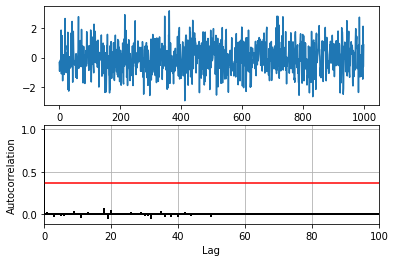

In [103]:
x = np.random.randn(1000)

plt.subplot(2,1,1)
plt.plot(x)

plt.subplot(2,1,2)
c = plt.acorr(x, usevlines=True, normed=True, maxlags=50, lw=2)
plt.grid(True)
plt.axhline(0, color='black', lw=2)
plt.axhline(1/np.exp(1), color='red')
plt.ylabel('Autocorrelation')
plt.xlim(xmin=0,xmax=100)
plt.xlabel('Lag')
plt.show()

Since this is a random data, there is no autocorrelation in the data. Hence, we can use original test.

In [104]:
print(mk.original_test(x, alpha=0.01))

Mann_Kendall_Test(trend='no trend', h=False, p=0.07196349007874736, z=1.7993490094629672, Tau=0.038002002002002, s=18982.0, var_s=111277500.0, slope=0.00020543467067033838, intercept=-0.17434323156942266)


We can see that there is no trend at the $\alpha=0.01$. Try increasing the threshold of $\alpha$ and check the output, remember our data is random so there should not be any trend in it.

Let us now generate a synthetic data with some autocorrelation.

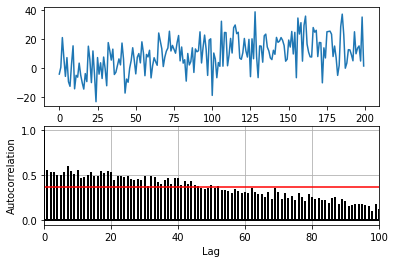

In [105]:
n = 200
x = np.random.randn(n)*10 + np.arange(n)/10

plt.subplot(2,1,1)
plt.plot(x)

plt.subplot(2,1,2)
c = plt.acorr(x, usevlines=True, normed=True, maxlags=100, lw=2)
plt.grid(True)
plt.axhline(0, color='black', lw=2)
plt.axhline(1/np.exp(1), color='red')
plt.ylabel('Autocorrelation')
plt.xlim(xmin=0,xmax=100)
plt.xlabel('Lag')
plt.show()

Since this data has autocorrelation, we will be using modified Mann Kendall test.

In [106]:
print(mk.hamed_rao_modification_test(x))

Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='increasing', h=True, p=7.112621602800573e-11, z=6.518262937025764, Tau=0.3171859296482412, s=6312.0, var_s=937416.5351472422, slope=0.09781412777505398, intercept=-0.0974169357685657)


It is showing an increasing trend. We can try other methods also.

In [107]:
print(mk.yue_wang_modification_test(x))
print(mk.trend_free_pre_whitening_modification_test(x))
print(mk.pre_whitening_modification_test(x))

Modified_Mann_Kendall_Test_Yue_Wang_Approach(trend='increasing', h=True, p=0.0, z=10.255633444696633, Tau=0.3171859296482412, s=6312.0, var_s=378679.1385001342, slope=0.09781412777505398, intercept=-0.0974169357685657)
Modified_Mann_Kendall_Test_Trend_Free_PreWhitening_Approach(trend='increasing', h=True, p=5.281708403970242e-11, z=6.562770635123205, Tau=0.31292827775239834, s=6165.0, var_s=882167.0, slope=0.09781412777505398, intercept=-0.0974169357685657)
Modified_Mann_Kendall_Test_PreWhitening_Approach(trend='increasing', h=True, p=1.0578774234382138e-06, z=4.880554930468003, Tau=0.23272930308106188, s=4585.0, var_s=882167.0, slope=0.09781412777505398, intercept=-0.0974169357685657)


Now let us estimate the non parametric slope.

In [108]:
import scipy as sp
n = 100
x = np.arange(n)
y = x*5 + 2*np.random.randn(n)

ab_np = sp.stats.mstats.theilslopes(y, x, 0.90)
ab_linear = sp.stats.mstats.linregress(x, y)

print(ab_np)
print(ab_linear)

(5.0090939887046595, -2.6083258455279577, 4.999694208900967, 5.021938775700241)
LinregressResult(slope=5.0091018642965945, intercept=-0.15129382440929362, rvalue=0.9999131255164262, pvalue=4.5763695800764e-186, stderr=0.0066701598171242035, intercept_stderr=0.3822123801317273)


Estimated parameters ($a$ and $b$) looks similar to the true parameters. Let us look at the data when some outliers are present.

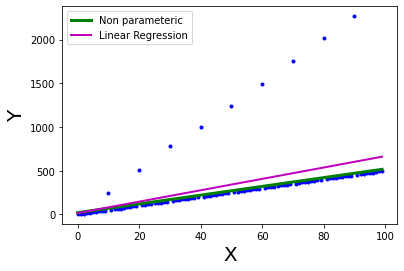

In [109]:
y[0:100:10] *= 5 # introduce some outliers

ab_np = sp.stats.mstats.theilslopes(y, x, 0.90)
ab_linear = sp.stats.mstats.linregress(x, y)

plt.plot(x, y, '.b')
plt.plot(x, ab_np[1] + ab_np[0] * x, c="g", lw=3, label="Non parameteric")
plt.plot(x, ab_linear[1] + ab_linear[0] * x, c="m", lw=2, label="Linear Regression")
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=20)
plt.legend(loc=2)
plt.show()

We can see that non parameteric regression is not much influenced by the outliers. 